# Data Mining Assignment 2_NN

## Student Details


Student Name and ID: Priyanka Wakte 1001886133

Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!<br>
Do not make any changes in the dataset file and do not rename the 'database.csv'.
<br> Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>. 
<br> Do not to forget to cite any external sources used by you. 
**10 points per question will be deducted incase you fail to do so**
<br>**DO NOT DELETE THIS CELL**<br>
#### Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn

## Programming Assignment Submission Instructions (2 Points)

Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

## Programming Assignment Details (25 Points)

For this assignment use Jupyter notebook, Panda, and scikit.

 * Load pima-indians-diabetes dataset from sklearn datasets. Output/prediction variable is 'class'[1 points]
 * while selecting best 3 attributes for training,validating and testing your model. [2 points]
 * Find the best K. [3 points]
 * Split your dataset - 60% for training set, 20% for Validation set and 20% for testing set the classifier. Use random state as 2022 [2 points]
 * Use minkowski distance.[1 points]
 * Test the classifier with three different numbers for neighbors and record the results for training, validation and testing. Show the best one.[3 points]
 * Use comments to explain your code and variable names.[4 points]
 * Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support) for all three different numbers.[6 points]
 * Plot the classifier in a 2D projection.[3 points]

## Report (23 Points)

For each classification task you need to submit a report (Microsoft Word, or PDF) that you have to:
* Explain all the preprocessing done in detail.[4 points]
* Explain all the parameters of KNN in details in your own words. Do not copy paste. Give references. 10 Points will be deducted if you copy paste from the internet. [5 points]
* Explain what was your criteria for selecting the three attributes. [5 points]
* Visualizations of the classifier in a 2D projection, and write your observations. [4 points]
* Interprete and compare the results explain in details.[5 points]

Do not to forget to cite your sources!

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# loading prima dataset
df_pima = pd.read_csv("pima-indians-diabetes.csv")
df_pima

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
# we need to find the missing values in the columns as part of pre-processing
df.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [14]:
# we can drop the columns that are not relavant
# drop_col is the variable that drops the irrelevant columns
drop_colu = ['Preg', 'skin']
df = df.drop(drop_col, axis=1)

In [15]:
# Displaying the first 10 rows after removing the columns that are not relavant 
df.head(10)

,Plas,Pres,test,mass,pedi,age,class
0,148,72,0,33.6,0.627,50,1
1,85,66,0,26.6,0.351,31,0
2,183,64,0,23.3,0.672,32,1
3,89,66,94,28.1,0.167,21,0
4,137,40,168,43.1,2.288,33,1
5,116,74,0,25.6,0.201,30,0
6,78,50,88,31.0,0.248,26,1
7,115,0,0,35.3,0.134,29,0
8,197,70,543,30.5,0.158,53,1
9,125,96,0,0.0,0.232,54,1


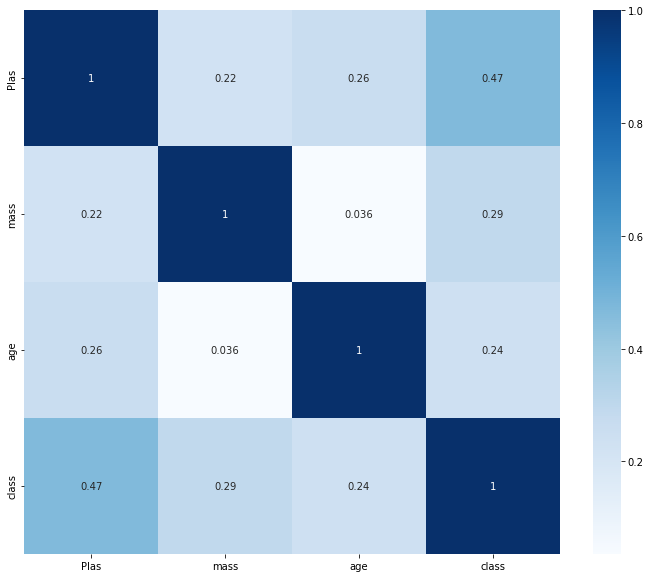

In [53]:
#We can use Pearson Correlation
plt.figure(figsize=(12,10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap=plt.cm.Blues)
plt.show()

In [18]:
#Correlation with output variable
corr_target = abs(cor["class"])
#Selecting highly correlated features
relevant_features = corr_target[corr_target>0]
relevant_features

Plas     0.466581
Pres     0.065068
test     0.130548
mass     0.292695
pedi     0.173844
age      0.238356
class    1.000000
Name: class, dtype: float64

In [19]:
#Moving the target variable to the last column
df['class'] = df.pop('class') 
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [23]:
#Now we should select the 3 best attributes from the 6 other attributes
score_func = SelectKBest(score_func=chi2, k='all').fit(X,y)
df_score = pd.DataFrame(score_func.scores_)
df_column = pd.DataFrame(X.columns)
# Concatenating two df_score and df_column to view the scores of corresponding columns 
feature_score = pd.concat([df_column,df_score],axis=1)
feature_score.columns = ['Attributes','Score']
# Print 6 best features
print(feature_score.nlargest(6,'Score'))

  Attributes        Score
2       test  2175.565273
0       Plas  1411.887041
5        age   181.303689
3       mass   127.669343
1       Pres    17.605373
4       pedi     5.392682


In [24]:
#Now We drop the columns that are not best 3 to train and test our model

drop_column_3 = ['Pres', 'test', 'pedi']
df = df.drop(drop_column_3, axis=1)
X = X.drop(drop_column_3, axis=1)
print(X)
print(y)

     Plas  mass  age
0     148  33.6   50
1      85  26.6   31
2     183  23.3   32
3      89  28.1   21
4     137  43.1   33
..    ...   ...  ...
763   101  32.9   63
764   122  36.8   27
765   121  26.2   30
766   126  30.1   47
767    93  30.4   23

[768 rows x 3 columns]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64


In [25]:
# for testing set
from sklearn.model_selection import train_test_split
X1_train, X_test, y1_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2022)

In [26]:
# for validation set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X1_train, y1_train, test_size = 0.20, random_state = 2022)

In [27]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
# Using minkowski distance.
classifier1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski')
classifier1.fit(X_train, y_train)

classifier2 = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski')
classifier2.fit(X_train, y_train)

classifier3 = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski')
classifier3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=24)

In [30]:
# y1,y2 and y3 are the prediction variables
y1 = classifier1.predict(X_test)
y2 = classifier2.predict(X_test)
y3 = classifier3.predict(X_test)

In [33]:
#Variables and code to get confusion matrix for different y values
from sklearn.metrics import confusion_matrix, accuracy_score
cm_1 = confusion_matrix(y_test, y1)
accuracy_score(y_test, y1)

from sklearn.metrics import confusion_matrix, accuracy_score
cm_2 = confusion_matrix(y_test, y2)
accuracy_score(y_test, y2)

from sklearn.metrics import confusion_matrix, accuracy_score
cm_3 = confusion_matrix(y_test, y3)
accuracy_score(y_test, y3)

print("Confusion Matrix for K = 5\n", accuracy_score(y_test, y1))
print(cm_1)
print("Confusion Matrix for K = 10\n", accuracy_score(y_test, y2))
print(cm_2)
print("Confusion Matrix for K = 24\n", accuracy_score(y_test, y3))
print(cm_3)

Confusion Matrix for K = 5
 0.7467532467532467
[[94 14]
 [25 21]]
Confusion Matrix for K = 10
 0.7727272727272727
[[98 10]
 [25 21]]
Confusion Matrix for K = 24
 0.7792207792207793
[[97 11]
 [23 23]]


In [34]:
#now getting the classification report
from sklearn.metrics import classification_report
print("Classification Report for K =5\n", classification_report(y_test, y1))
print("Classification Report for K =10\n", classification_report(y_test, y2))
print("Classification Report for K =24\n", classification_report(y_test, y3))

Classification Report for K =5
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       108
           1       0.60      0.46      0.52        46

    accuracy                           0.75       154
   macro avg       0.69      0.66      0.67       154
weighted avg       0.73      0.75      0.74       154

Classification Report for K =10
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       108
           1       0.68      0.46      0.55        46

    accuracy                           0.77       154
   macro avg       0.74      0.68      0.70       154
weighted avg       0.76      0.77      0.76       154

Classification Report for K =24
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       108
           1       0.68      0.50      0.58        46

    accuracy                           0.78       154
   macro avg       0.74      0

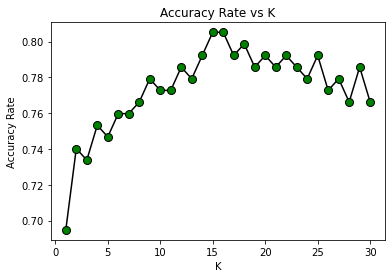

[0.69480519 0.74025974 0.73376623 0.75324675 0.74675325 0.75974026
 0.75974026 0.76623377 0.77922078 0.77272727 0.77272727 0.78571429
 0.77922078 0.79220779 0.80519481 0.80519481 0.79220779 0.7987013
 0.78571429 0.79220779 0.78571429 0.79220779 0.78571429 0.77922078
 0.79220779 0.77272727 0.77922078 0.76623377 0.78571429 0.76623377]


In [37]:
#plotting graph for accuracy and its rate
from sklearn import metrics
accuracy_rate=np.zeros(30)
for n in range(1,31):
    knn_accu=KNeighborsClassifier(n_neighbors=n)
    knn_accu.fit(X_train,y_train)
    pred_accu = knn_accu.predict(X_test)
    accuracy_rate[n-1]=metrics.accuracy_score(y_test, pred_accu)
    
plt.plot(range(1,31),accuracy_rate,color='black', marker='o', markerfacecolor='green', markersize=8)
plt.title('Accuracy Rate vs K')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()
print(accuracy_rate)

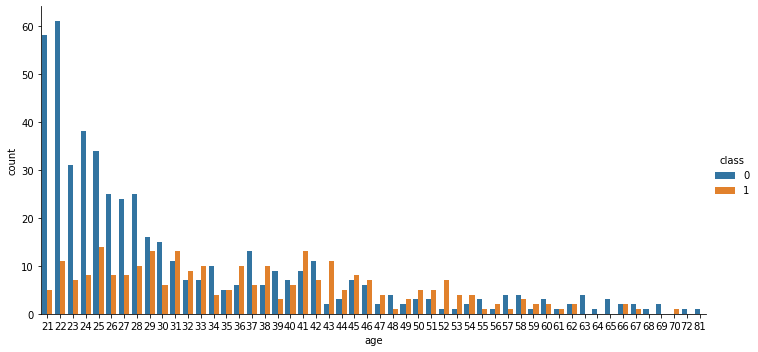

In [41]:
survived_count = sns.catplot(x="age", hue="class",
                data=df, kind="count",
                height=5, aspect=2);

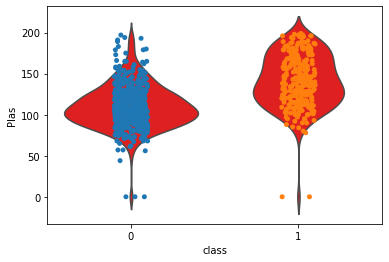

In [48]:
ax = sns.violinplot(x="class", y="Plas", data=df,
                    inner=None, color="red")
ax = sns.stripplot(x="class", y="Plas", data=df)

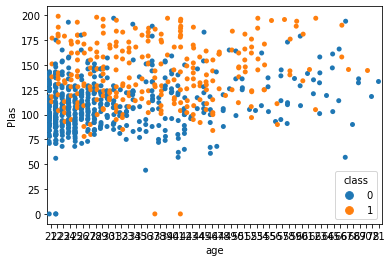

In [47]:
ax = sns.stripplot(x="age", y="Plas", hue="class", data=df, dodge=True)